Selected Contur: 3652.0


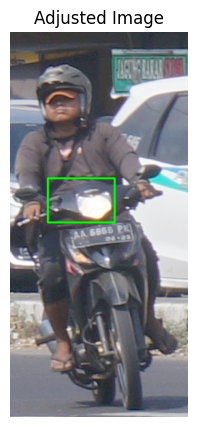

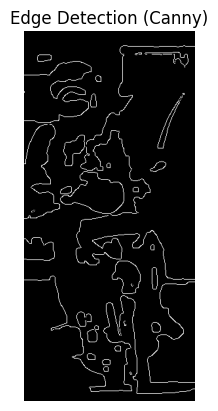

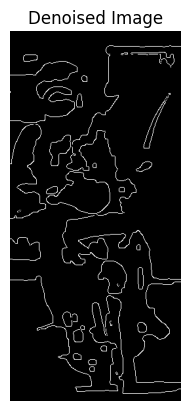

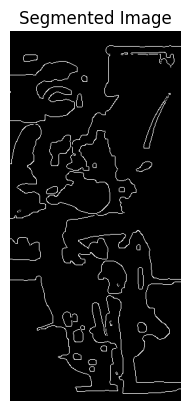

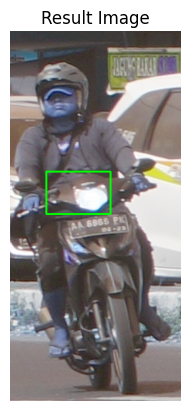

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def edge_detection_pipeline(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    median_filtered_image = cv2.medianBlur(equalized_image, 5)
    blurred_image = cv2.GaussianBlur(median_filtered_image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    kernel = np.ones((5, 5), np.uint8)
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    edges_canny = cv2.Canny(dilated_image, 90, 200)
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
    edges_sobel = cv2.magnitude(sobel_x, sobel_y)
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    return edges_canny, edges_sobel, laplacian

def noise_reduction_pipeline(image):
    denoised_bilateral = cv2.fastNlMeansDenoising(image, 10, 10, 7, 21)
    return denoised_bilateral

def image_contour_pipeline(image, image_ori, min_area, max_area):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    selected_contours = []

    for contour in contours:
        if min_area < cv2.contourArea(contour) < max_area:
            selected_contours.append(contour)
            print("Selected Contur:", cv2.contourArea(contour))

    if not selected_contours:
        return image_ori, image

    for contour in selected_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_ori, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image_ori, image

def morph_image(image, kernel_size=(3, 3), iterations=2):
    kernel = np.ones(kernel_size, np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    dilated_image = cv2.bitwise_not(dilated_image)
    return dilated_image

def image_segmentation_pipeline(image):
    # Otsu's Thresholding
    ret, otsu_thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menampilkan citra hasil thresholding
    return otsu_thresholded_image

# # Load an image
# image = cv2.imread('/Users/macbookair/Documents/Uni/PAAI/Dataset/K4 - Plat Putih Mobil/K4_AA1012PJ.JPG')  # Ganti 'path/to/your/image.jpg' dengan path gambar Anda

# # Adjust gamma (optional)
# adjusted_image = adjust_gamma(image, gamma=1.5)

# # Preprocess and perform edge detection
# gray_image = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)
# equalized_image = cv2.equalizeHist(gray_image)
# blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
# edges_canny = cv2.Canny(blurred_image, 90, 200)
# Load an image
image = cv2.imread('/Users/macbookair/Documents/Uni/PAAI/Dataset/K1 - Plat Hitam Motor /K1_A6885PK.JPG')

# Ensure the image is in BGR format (3 channels)
if image.shape[2] == 1:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Adjust gamma (optional)
adjusted_image = adjust_gamma(image, gamma=2.0)

# Preprocess and perform edge detection
edges_canny, edges_sobel, laplacian = edge_detection_pipeline(adjusted_image)

# Reduce noise (optional)
denoised_image = noise_reduction_pipeline(edges_canny)

# Image segmentation (optional)
segmented_image = image_segmentation_pipeline(denoised_image)

# Image contour detection
result_image, _ = image_contour_pipeline(segmented_image, adjusted_image, min_area=1850, max_area=50000)


# Display the processed image and edge detection result
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title("Adjusted Image")
plt.axis('off')  # Hide axis
plt.show()

plt.subplot(122)
plt.imshow(edges_canny, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')  # Hide axis
plt.show()

plt.subplot(122)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis('off')  # Hide axis
plt.show()

plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')  # Hide axis
plt.show()

plt.subplot(122)
plt.imshow(result_image, cmap='gray')
plt.title("Result Image")
plt.axis('off')  # Hide axis
plt.show()

